In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [54]:
df = pd.read_csv('initial_claf.csv')

In [55]:
df.columns

Index(['Initial Calf Mucle Volume (cm3)', 'Calf Mucle Volume Loss (cm3)'], dtype='object')

In [56]:
X = df['Initial Calf Mucle Volume (cm3)'].values.reshape(-1,1)
y = df['Calf Mucle Volume Loss (cm3)'].values.reshape(-1,1)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression()

In [58]:
regressor.predict([[40]])


array([[96.27455833]])

In [59]:
y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred


,Actual,Predicted
0,-201.376147,-124.004046
1,-122.018349,-102.152710
2,-161.926606,-80.087145
3,-62.385321,-25.673034


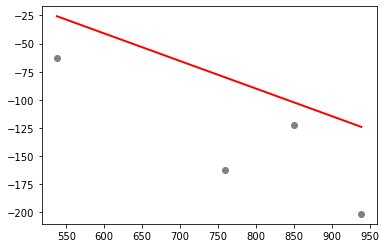

In [60]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [80]:
import pickle


In [81]:
filename = 'calf_muscle_loss.sav'
pickle.dump(regressor, open(filename, 'wb'))


In [82]:
loaded_model = pickle.load(open('calf_muscle_loss.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

-0.3664890440328026


In [83]:
loaded_model.predict([[700]])

array([[-65.47674205]])

In [85]:
df1 = pd.read_csv('treadmill.csv')

In [86]:
df1.columns

Index(['Treadmill Exercise Time (min/wk)', 'Calf Muscle Volume Loss (cm3)'], dtype='object')

In [88]:
X = df1['Calf Muscle Volume Loss (cm3)'].values.reshape(-1,1)
y = df1['Treadmill Exercise Time (min/wk)'].values.reshape(-1,1)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression()

In [90]:
regressor.predict([[-100]])

array([[153.69604088]])

In [91]:
y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred


,Actual,Predicted
0,197.368421,126.085590
1,273.245614,197.009936
2,30.263158,139.027989
3,77.631579,86.223001


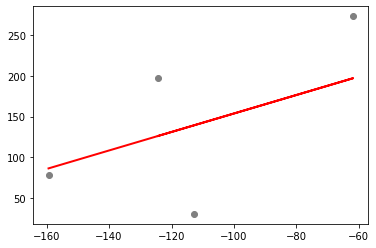

In [92]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [93]:
filename = 'treadmill.sav'
pickle.dump(regressor, open(filename, 'wb'))


In [95]:
loaded_model = pickle.load(open('treadmill.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.382066689955161


In [100]:
calf_muscle_loss_model = pickle.load(open('calf_muscle_loss.sav', 'rb')) 
calf_muscle_loss = calf_muscle_loss_model.predict([[500]]) 
calf_muscle_loss


array([[-16.46119648]])

In [101]:
treadmill_time_model = pickle.load(open('treadmill.sav', 'rb'))
treadmill_time = calf_muscle_loss_model.predict([[-200]]) 
treadmill_time


array([[155.09321301]])

In [110]:
def treadmill(initial_calf_muscle_volume):
    # initial_calf_muscle_volume is an interger input in cm3

    # this function returns time on treadmill based on initial_calf_muscle_volume
    # WHAT DO THE VARIABLES MEAN?
    # message is a string that gives reccomended time on treadmill per week
    # exercise is a string that outputs treadmill  
    # learn more is where to read more about results

    # EXAMPLE TO CALL THE FUNCTION
    # treadmill(700) 

    calf_muscle_loss_model = pickle.load(open('calf_muscle_loss.sav', 'rb')) 
    calf_muscle_loss = calf_muscle_loss_model.predict([[initial_calf_muscle_volume]]) 
    calf_muscle_loss = calf_muscle_loss[0][0]
    treadmill_time_model = pickle.load(open('treadmill.sav', 'rb'))
    treadmill_time = calf_muscle_loss_model.predict([[calf_muscle_loss]]) 
    treadmill_time = treadmill_time[0][0]

    message = '' 
    exercise = 'treadmill'

    learn_more ='https://www.nasa.gov/mission_pages/station/research/station-science-101/bone-muscle-loss-in-microgravity/'
    message = 'The loss of calf muscle is ' + str(calf_muscle_loss)[:5] + ' cm3,  and you have to exercise using the treadmill for ' + str(treadmill_time)[:2] + ' minutes per week.'

    return message, exercise, learn_more

In [111]:
treadmill(700)

('The loss of calf muscle is -65. cm3,  and you have to exercise using the treadmill for 12 minutes per week.',
 'treadmill',
 'https://www.nasa.gov/mission_pages/station/research/station-science-101/bone-muscle-loss-in-microgravity/')